In [9]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
from pathlib import Path
import ot
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from utils import LoadCloudPoint, DistanceProfile
from utils import compute_W_matrix_distance_matrix_input
from utils import plot_3d_points_and_connections

In [2]:
import random

random.seed(10)

lcp = LoadCloudPoint(filepath="datasets/csv_files/0005_Jogging001.csv")
source_pc, target_pc = lcp.get_two_random_point_cloud()

dp = DistanceProfile(source_pc, target_pc)
distance_matrix = dp.compute_L2_matrix()

Loaded point cloud data from datasets\csv_files\0005_Jogging001.csv, number of frames: 1377


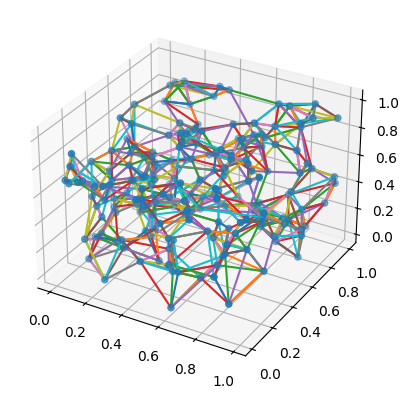

In [3]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate example 3D mocap data
np.random.seed(0)
mocap_data = np.random.rand(200, 3)

# Compute kNN
k = 5
nbrs = NearestNeighbors(n_neighbors=k+1).fit(mocap_data)
distances, indices = nbrs.kneighbors(mocap_data)

indices = indices[:, 1:]  # remove self
distances = distances[:, 1:]

# Plot 3D points and edges
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(mocap_data[:,0], mocap_data[:,1], mocap_data[:,2])

# Draw edges
for i in range(mocap_data.shape[0]):
    for j in indices[i]:
        p1 = mocap_data[i]
        p2 = mocap_data[j]
        ax.plot([p1[0], p2[0]], [p1[1], p2[1]], [p1[2], p2[2]])

plt.show()


In [4]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
import plotly.graph_objects as go

# Example mocap data (replace with your own)
np.random.seed(1)
mocap_data = source_pc

# Compute kNN
k = 2
nbrs = NearestNeighbors(n_neighbors=k+1).fit(mocap_data)
distances, indices = nbrs.kneighbors(mocap_data)
indices = indices[:,1:]

# Build edge lines
edge_x, edge_y, edge_z = [], [], []
for i in range(mocap_data.shape[0]):
    for j in indices[i]:
        p1 = mocap_data[i]
        p2 = mocap_data[j]
        edge_x += [p1[0], p2[0], None]
        edge_y += [p1[1], p2[1], None]
        edge_z += [p1[2], p2[2], None]

# Build figure
fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=edge_x, y=edge_y, z=edge_z,
    mode="lines",
    line=dict(width=2),
    hoverinfo="none"
))

fig.add_trace(go.Scatter3d(
    x=mocap_data[:,0],
    y=mocap_data[:,1],
    z=mocap_data[:,2],
    mode="markers",
    marker=dict(size=4),
    hoverinfo="none"
))

fig.update_layout(
    title="Interactive 3D kNN Mocap Graph",
    scene=dict(aspectmode="data"),
    width=900,
    height=700
)

fig.show()


In [5]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
import plotly.graph_objects as go

def plot_kth_neighbor_graph(points, k):
    """
    Build and display an interactive 3D graph where each point
    connects ONLY to its k-th nearest neighbor.

    points : (N, 3) numpy array of 3D coordinates
    k      : integer, which neighbor index to connect (1 = nearest)
    """

    points = np.asarray(points)
    N = points.shape[0]

    # --- Compute k-nearest neighbors ---
    nbrs = NearestNeighbors(n_neighbors=k+1).fit(points)
    distances, indices = nbrs.kneighbors(points)

    # Each row: [self, 1st NN, 2nd NN, ..., kth NN]
    kth_neighbors = indices[:, k]  # extract only the k-th neighbor

    # Build edge coordinate lists
    edge_x = []
    edge_y = []
    edge_z = []

    for i in range(N):
        p1 = points[i]
        p2 = points[kth_neighbors[i]]
        edge_x += [p1[0], p2[0], None]
        edge_y += [p1[1], p2[1], None]
        edge_z += [p1[2], p2[2], None]

    # --- Build interactive Plotly figure ---
    fig = go.Figure()

    # Edges
    fig.add_trace(go.Scatter3d(
        x=edge_x, y=edge_y, z=edge_z,
        mode="lines",
        line=dict(width=3),
        hoverinfo="none"
    ))

    # Nodes
    fig.add_trace(go.Scatter3d(
        x=points[:,0], y=points[:,1], z=points[:,2],
        mode="markers",
        marker=dict(size=5),
        hoverinfo="text",
        text=[f"Point {i}" for i in range(N)]
    ))

    fig.update_layout(
        title=f"3D Graph (only {k}-th nearest neighbor connections)",
        scene=dict(aspectmode="data"),
        width=900,
        height=700
    )

    fig.show()


# ------------------------------
# Example usage:
# ------------------------------

if __name__ == "__main__":
    np.random.seed(0)
    pts = np.random.rand(200, 3)

    plot_kth_neighbor_graph(source_pc, k=2)



In [6]:
plot_kth_neighbor_graph(source_pc, k=1)

In [7]:
plot_kth_neighbor_graph(source_pc, k=2)


In [8]:
plot_kth_neighbor_graph(source_pc, k=3)